In [110]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

In [111]:
import pandas as pd
import pickle
import sqlite3
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, TruncatedSVD

In [112]:
# Load data

articles1 = pd.read_csv("articles1.csv")
articles2 = pd.read_csv("articles2.csv")
articles3 = pd.read_csv("articles3.csv")
articles = pd.concat([articles1, articles2, articles3])

# This helps to cut down the volume of data I'm working with
articles_train, articles_test = train_test_split(articles, test_size=0.5)

uci = pd.read_csv("uci-news-aggregator.csv")
uci.columns = [k.lower() for k in uci.columns]

In [113]:
def get_pub_dict():
    pub_dict = {}

    for pub in set(articles_train.publication):
        pub_df = articles_train[articles_train.publication == pub]
        pub_data = zip(pub_df.date, pub_df.title, pub_df.content)
        pub_dict[pub] = pub_data
        
    return pub_dict    


def get_topics(model, feature_names, no_top_words):
    topics = []
    for _, topic in enumerate(model.components_):
        topics.append([(feature_names[i], np.round(lsa_cv.components_[_][i], 3)) for i in topic.argsort()[:-no_top_words-1:-1]])
    return topics




In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df = 0.05,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df = 0.05,
                                   max_df = 0.6)

In [115]:
n_comp = 10
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

In [116]:
example = articles.content
example = list(example)
import random
random.shuffle(example)

example2 = example[:1000]

In [117]:
num_top_words = 10
pub_dict = get_pub_dict()
publications = pub_dict.keys()

# topic_pub_dict = {}

# pub_articles = [k[2] for k in pub_dict[pub]]

cv_articles_data = count_vectorizer.fit_transform(example2)
tfidf_articles_data = tfidf_vectorizer.fit_transform(example2)

lsa_tfidf_articles_data = lsa_tfidf.fit_transform(tfidf_articles_data)
lsa_cv_articles_data = lsa_cv.fit_transform(cv_articles_data)
nmf_cv_articles_data = nmf_cv.fit_transform(cv_articles_data)

pub_lsa_tfidf = get_topics(lsa_tfidf, tfidf_vectorizer.get_feature_names(), num_top_words)
pub_lsa_cv    = get_topics(lsa_cv,    count_vectorizer.get_feature_names(), num_top_words)
pub_nmf_cv    = get_topics(nmf_cv,    count_vectorizer.get_feature_names(), num_top_words)

# topic_pub_dict[pub] = [pub_lsa_tfidf, pub_lsa_cv, pub_nmf_cv]
    
    
# pub_df = pd.DataFrame.from_dict(topic_pub_dict, orient="index")   
# pub_df.columns = ["lsa_tfidf", "lsa_cv", "nmf_cv"]

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lsa_cv_articles_data = scaler.fit_transform(lsa_cv_articles_data)

### TSNE: LSA CV

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.322535
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 62.6677818, gradient norm = 0.2029431 (50 iterations in 2.593s)
[t-SNE] Iteration 100: error = 62.0904808, gradient norm = 0.2067014 (50 iterations in 3.003s)
[t-SNE] Iteration 150: error = 62.0259209, gradient norm = 0.2094832 (50 iterations in 2.529s)
[t-SNE] Iteration 200: error = 62.2111855, gradient norm = 0.2069832 (50 iterations in 2.321s)
[t-SNE] Iteration 250: error = 62.0527191, gradient norm = 0.2077724 (50 iterations in 2.435s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.052719
[t-SNE] Iteration 300: error = 0.8237983, gradient norm = 0.0010148 (50 iterations in 2.016s)
[t-SNE] Iteration 350: error = 0.7743518, gradient norm = 0.0002

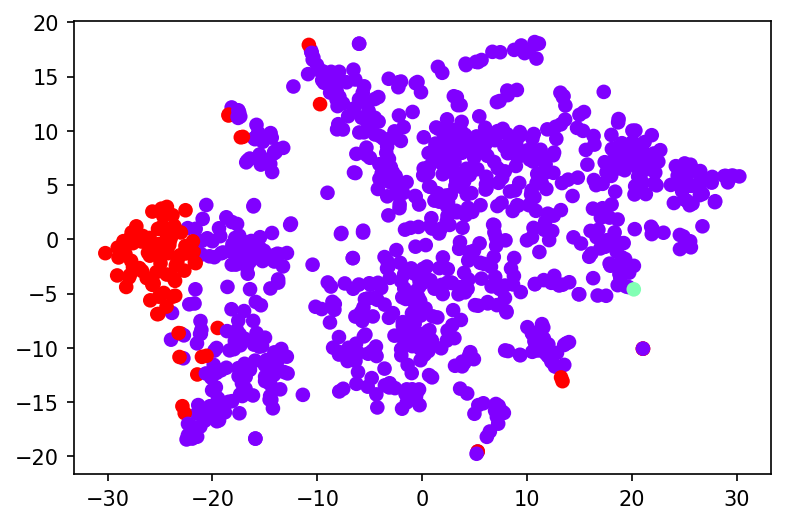

In [120]:
km = KMeans(n_clusters=3)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.322535
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 62.5962296, gradient norm = 0.2063036 (50 iterations in 2.995s)
[t-SNE] Iteration 100: error = 62.1758270, gradient norm = 0.2211971 (50 iterations in 2.449s)
[t-SNE] Iteration 150: error = 61.9555092, gradient norm = 0.2085233 (50 iterations in 2.645s)
[t-SNE] Iteration 200: error = 62.2006035, gradient norm = 0.2155205 (50 iterations in 2.854s)
[t-SNE] Iteration 250: error = 62.1919746, gradient norm = 0.2087312 (50 iterations in 2.651s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.191975
[t-SNE] Iteration 300: error = 0.8223957, gradient norm = 0.0008442 (50 iterations in 1.978s)
[t-SNE] Iteration 350: error = 0.7757030, gradient norm = 0.0004

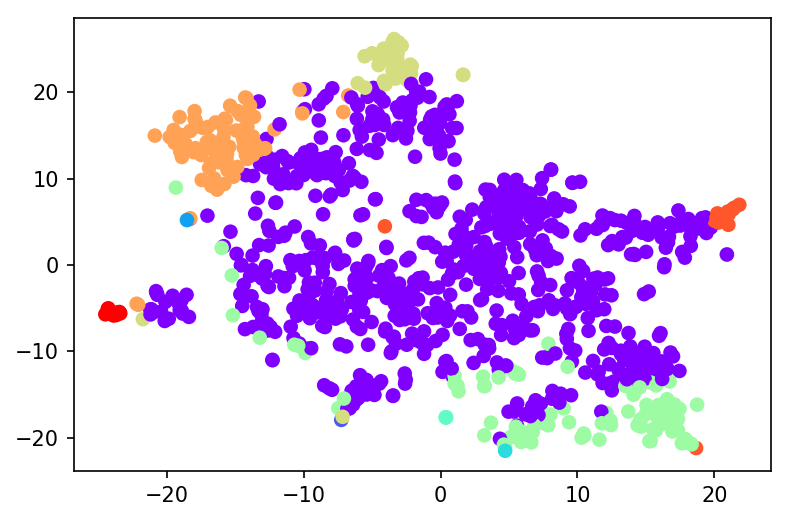

In [121]:
km = KMeans(n_clusters=10)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.322535
[t-SNE] Computed conditional probabilities in 0.061s
[t-SNE] Iteration 50: error = 62.7611580, gradient norm = 0.2003141 (50 iterations in 2.814s)
[t-SNE] Iteration 100: error = 62.5046272, gradient norm = 0.2215468 (50 iterations in 3.241s)
[t-SNE] Iteration 150: error = 62.0408783, gradient norm = 0.2091666 (50 iterations in 2.435s)
[t-SNE] Iteration 200: error = 61.9286804, gradient norm = 0.2076211 (50 iterations in 2.317s)
[t-SNE] Iteration 250: error = 61.9611740, gradient norm = 0.2088314 (50 iterations in 2.696s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.961174
[t-SNE] Iteration 300: error = 0.8443917, gradient norm = 0.0009762 (50 iterations in 2.094s)
[t-SNE] Iteration 350: error = 0.8007419, gradient norm = 0.0002

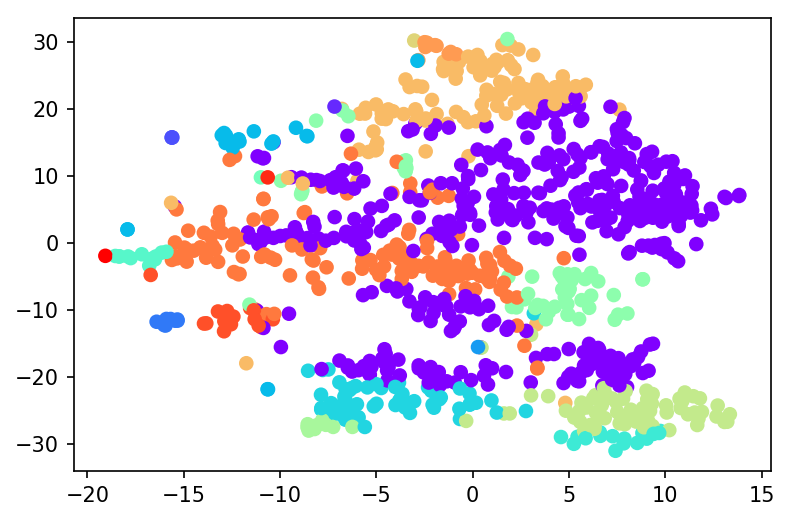

In [122]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.322535
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 62.5518227, gradient norm = 0.2071768 (50 iterations in 2.723s)
[t-SNE] Iteration 100: error = 62.1619225, gradient norm = 0.2173722 (50 iterations in 2.316s)
[t-SNE] Iteration 150: error = 62.1947632, gradient norm = 0.2185297 (50 iterations in 2.229s)
[t-SNE] Iteration 200: error = 62.2079353, gradient norm = 0.2165250 (50 iterations in 2.521s)
[t-SNE] Iteration 250: error = 62.3536720, gradient norm = 0.2097582 (50 iterations in 2.259s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.353672
[t-SNE] Iteration 300: error = 0.8303856, gradient norm = 0.0014135 (50 iterations in 1.926s)
[t-SNE] Iteration 350: error = 0.7808371, gradient norm = 0.0002

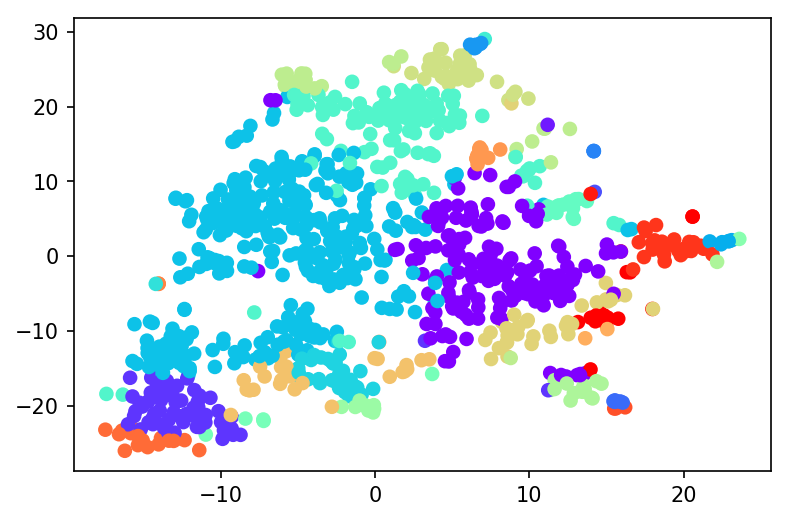

In [123]:
km = KMeans(n_clusters=30)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

### TSNE: LSA TFIDF

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 63.8601112, gradient norm = 0.2141342 (50 iterations in 2.491s)
[t-SNE] Iteration 100: error = 63.0325546, gradient norm = 0.2092173 (50 iterations in 2.508s)
[t-SNE] Iteration 150: error = 62.8473320, gradient norm = 0.2122346 (50 iterations in 2.335s)
[t-SNE] Iteration 200: error = 63.1811409, gradient norm = 0.2170268 (50 iterations in 2.041s)
[t-SNE] Iteration 250: error = 63.2716370, gradient norm = 0.2276871 (50 iterations in 2.237s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.271637
[t-SNE] Iteration 300: error = 1.0106095, gradient norm = 0.0011085 (50 iterations in 1.866s)
[t-SNE] Iteration 350: error = 0.9608175, gradient norm = 0.0006

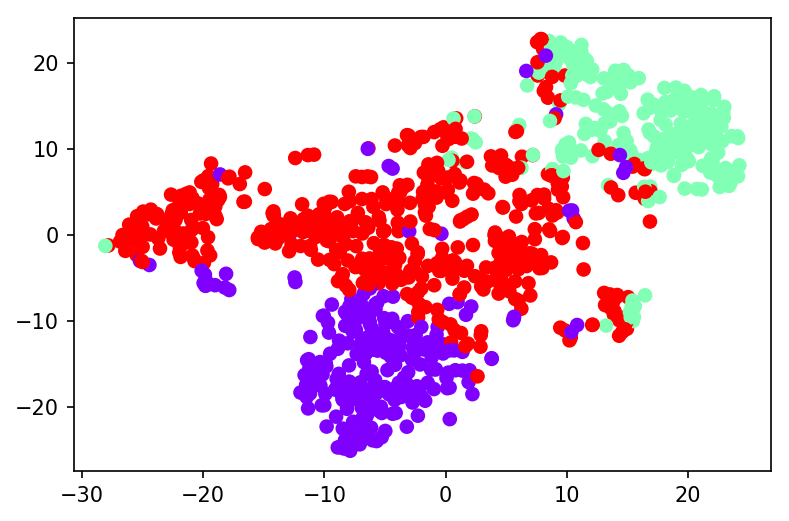

In [124]:
km = KMeans(n_clusters=3)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 63.9217834, gradient norm = 0.2300616 (50 iterations in 2.401s)
[t-SNE] Iteration 100: error = 62.8892097, gradient norm = 0.2234235 (50 iterations in 2.355s)
[t-SNE] Iteration 150: error = 62.6740646, gradient norm = 0.2097619 (50 iterations in 2.534s)
[t-SNE] Iteration 200: error = 62.8377457, gradient norm = 0.2113793 (50 iterations in 2.628s)
[t-SNE] Iteration 250: error = 62.9007339, gradient norm = 0.2098867 (50 iterations in 2.693s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.900734
[t-SNE] Iteration 300: error = 0.9829601, gradient norm = 0.0013023 (50 iterations in 2.106s)
[t-SNE] Iteration 350: error = 0.9313926, gradient norm = 0.0003

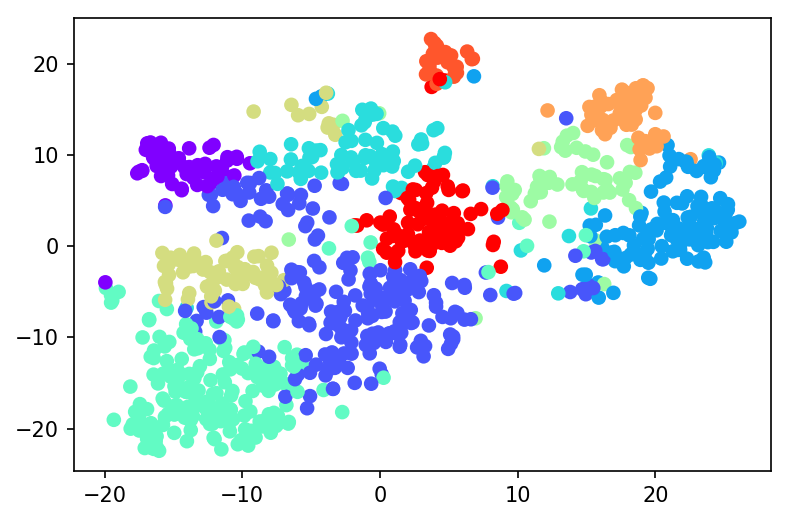

In [125]:
km = KMeans(n_clusters=10)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 64.0743561, gradient norm = 0.2004672 (50 iterations in 2.347s)
[t-SNE] Iteration 100: error = 62.8708878, gradient norm = 0.2118822 (50 iterations in 2.795s)
[t-SNE] Iteration 150: error = 62.9179955, gradient norm = 0.2238256 (50 iterations in 2.698s)
[t-SNE] Iteration 200: error = 62.7319908, gradient norm = 0.2089349 (50 iterations in 2.293s)
[t-SNE] Iteration 250: error = 62.8762131, gradient norm = 0.2128950 (50 iterations in 2.236s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.876213
[t-SNE] Iteration 300: error = 0.9460251, gradient norm = 0.0009642 (50 iterations in 1.918s)
[t-SNE] Iteration 350: error = 0.8950954, gradient norm = 0.0002

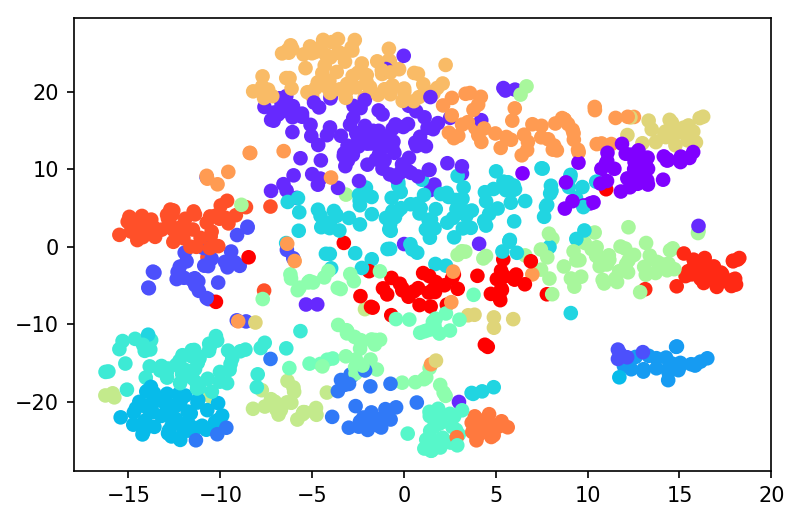

In [126]:
km = KMeans(n_clusters=20)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 64.1536102, gradient norm = 0.2175927 (50 iterations in 2.161s)
[t-SNE] Iteration 100: error = 62.8209877, gradient norm = 0.2231491 (50 iterations in 2.484s)
[t-SNE] Iteration 150: error = 62.7522354, gradient norm = 0.2136947 (50 iterations in 3.167s)
[t-SNE] Iteration 200: error = 62.7850952, gradient norm = 0.2138126 (50 iterations in 2.778s)
[t-SNE] Iteration 250: error = 62.8007126, gradient norm = 0.2278390 (50 iterations in 2.520s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.800713
[t-SNE] Iteration 300: error = 0.9920844, gradient norm = 0.0013514 (50 iterations in 2.140s)
[t-SNE] Iteration 350: error = 0.9363506, gradient norm = 0.0003

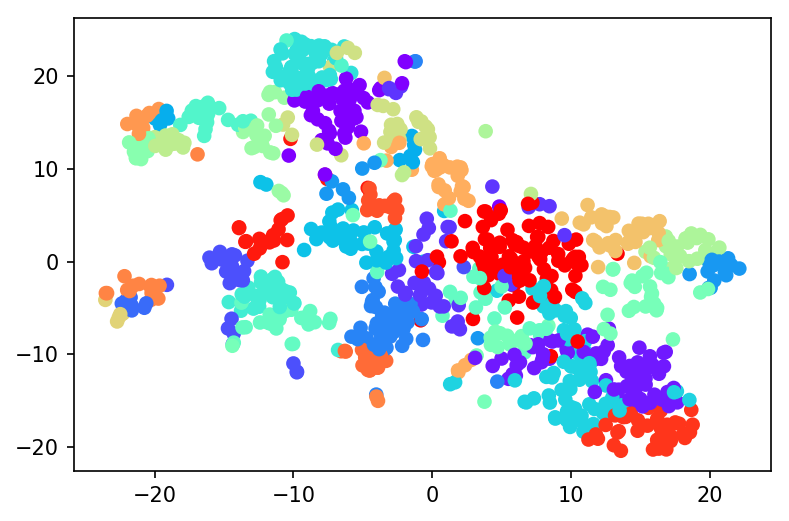

In [127]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 63.8515320, gradient norm = 0.2248347 (50 iterations in 2.482s)
[t-SNE] Iteration 100: error = 63.1189880, gradient norm = 0.2019635 (50 iterations in 2.133s)
[t-SNE] Iteration 150: error = 63.2311630, gradient norm = 0.2100469 (50 iterations in 2.168s)
[t-SNE] Iteration 200: error = 62.9257240, gradient norm = 0.2178854 (50 iterations in 2.122s)
[t-SNE] Iteration 250: error = 62.8113556, gradient norm = 0.2189052 (50 iterations in 2.168s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.811356
[t-SNE] Iteration 300: error = 0.9317641, gradient norm = 0.0008297 (50 iterations in 1.892s)
[t-SNE] Iteration 350: error = 0.8882970, gradient norm = 0.0002

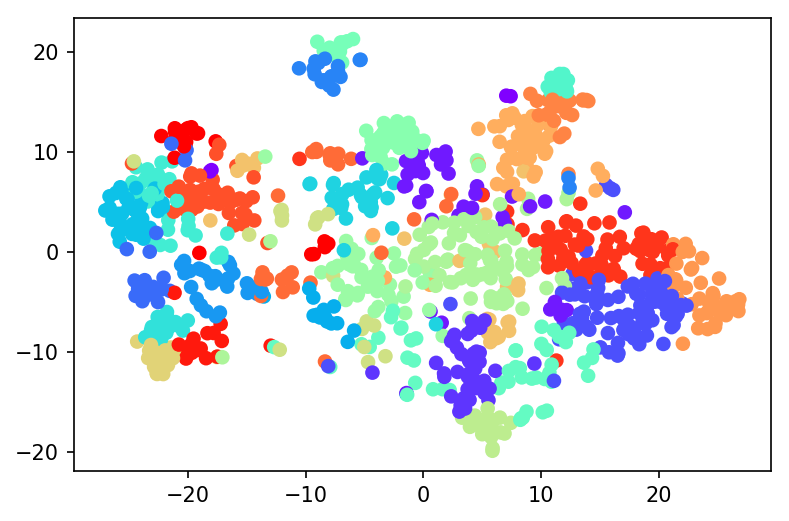

In [128]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=10, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 64.1722946, gradient norm = 0.2145902 (50 iterations in 2.324s)
[t-SNE] Iteration 100: error = 62.8598404, gradient norm = 0.2230411 (50 iterations in 2.428s)
[t-SNE] Iteration 150: error = 62.6125259, gradient norm = 0.2144334 (50 iterations in 2.228s)
[t-SNE] Iteration 200: error = 62.6213875, gradient norm = 0.2258754 (50 iterations in 3.065s)
[t-SNE] Iteration 250: error = 62.6417236, gradient norm = 0.2149893 (50 iterations in 3.673s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.641724
[t-SNE] Iteration 300: error = 1.0261668, gradient norm = 0.0010037 (50 iterations in 3.061s)
[t-SNE] Iteration 350: error = 0.9666691, gradient norm = 0.0004

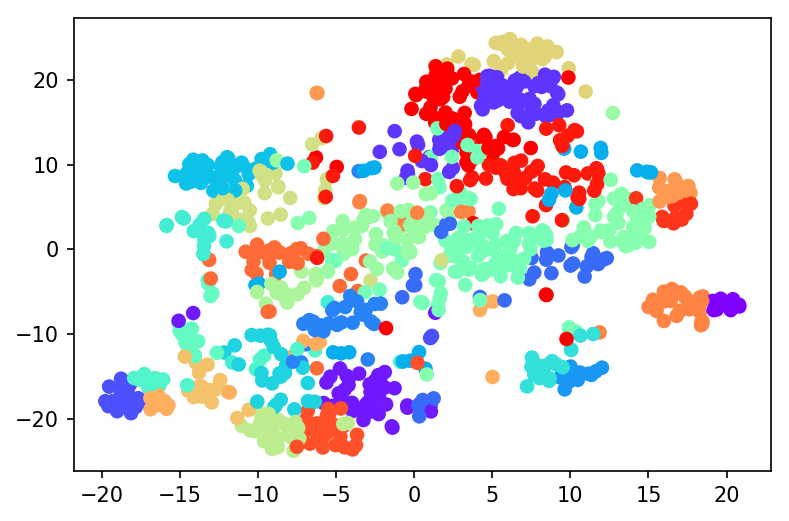

In [129]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=20, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.112s
[t-SNE] Iteration 50: error = 63.9253006, gradient norm = 0.2065841 (50 iterations in 3.351s)
[t-SNE] Iteration 100: error = 63.1968040, gradient norm = 0.2026500 (50 iterations in 2.881s)
[t-SNE] Iteration 150: error = 63.0742760, gradient norm = 0.2107456 (50 iterations in 2.711s)
[t-SNE] Iteration 200: error = 62.8606796, gradient norm = 0.2117451 (50 iterations in 2.435s)
[t-SNE] Iteration 250: error = 62.8575745, gradient norm = 0.2135507 (50 iterations in 2.252s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.857574
[t-SNE] Iteration 300: error = 0.9834330, gradient norm = 0.0011038 (50 iterations in 2.486s)
[t-SNE] Iteration 350: error = 0.9148242, gradient norm = 0.0003

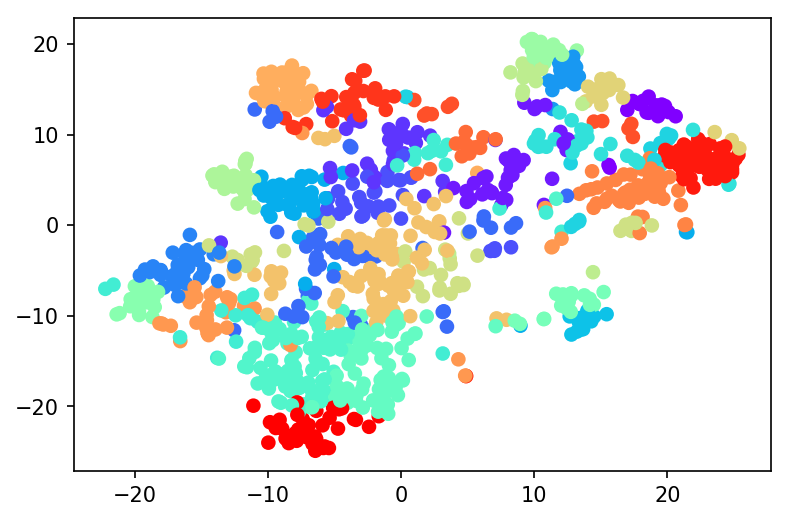

In [130]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.103167
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 64.4905014, gradient norm = 0.2065985 (50 iterations in 3.054s)
[t-SNE] Iteration 100: error = 62.9860725, gradient norm = 0.2172990 (50 iterations in 2.252s)
[t-SNE] Iteration 150: error = 62.8809586, gradient norm = 0.2137261 (50 iterations in 2.284s)
[t-SNE] Iteration 200: error = 62.7851944, gradient norm = 0.2216443 (50 iterations in 2.454s)
[t-SNE] Iteration 250: error = 62.6945877, gradient norm = 0.2058580 (50 iterations in 2.543s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.694588
[t-SNE] Iteration 300: error = 0.9829044, gradient norm = 0.0009597 (50 iterations in 1.995s)
[t-SNE] Iteration 350: error = 0.9285905, gradient norm = 0.0003

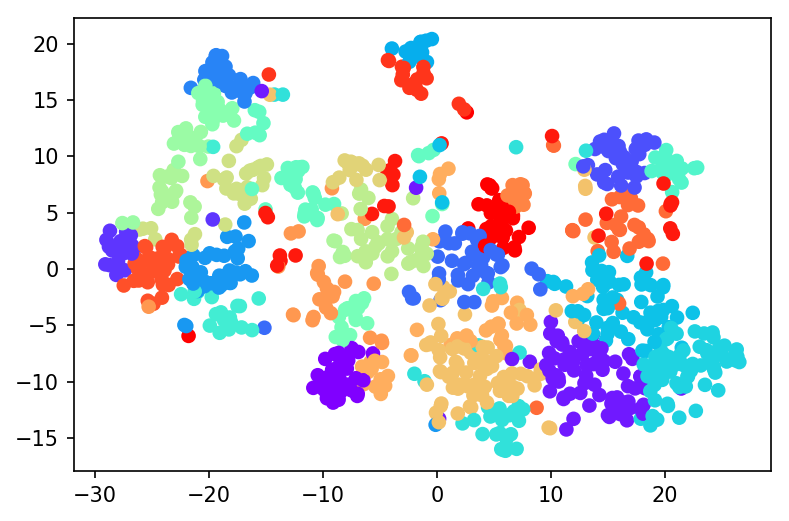

In [131]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

### TSNE: NMF CV

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.102601
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 62.9593735, gradient norm = 0.1996042 (50 iterations in 2.489s)
[t-SNE] Iteration 100: error = 61.7822685, gradient norm = 0.1899683 (50 iterations in 2.224s)
[t-SNE] Iteration 150: error = 61.7488441, gradient norm = 0.1909270 (50 iterations in 2.208s)
[t-SNE] Iteration 200: error = 61.7368050, gradient norm = 0.1867262 (50 iterations in 2.160s)
[t-SNE] Iteration 250: error = 61.7783470, gradient norm = 0.1920423 (50 iterations in 2.187s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.778347
[t-SNE] Iteration 300: error = 0.7038419, gradient norm = 0.0006388 (50 iterations in 2.063s)
[t-SNE] Iteration 350: error = 0.6642756, gradient norm = 0.0002

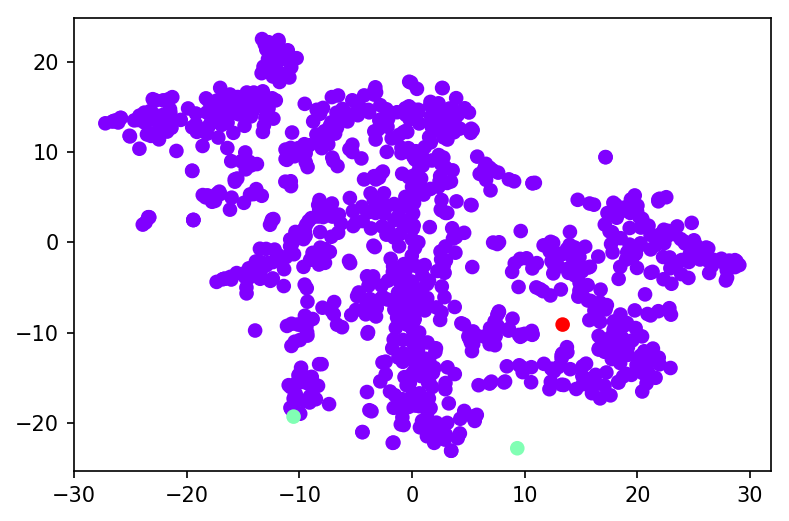

In [132]:
km = KMeans(n_clusters=3)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.102601
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 62.8647919, gradient norm = 0.1936880 (50 iterations in 2.506s)
[t-SNE] Iteration 100: error = 61.7829475, gradient norm = 0.1905792 (50 iterations in 2.313s)
[t-SNE] Iteration 150: error = 61.7339096, gradient norm = 0.1873945 (50 iterations in 2.332s)
[t-SNE] Iteration 200: error = 61.8006172, gradient norm = 0.1938999 (50 iterations in 2.248s)
[t-SNE] Iteration 250: error = 61.7714043, gradient norm = 0.1947316 (50 iterations in 2.100s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.771404
[t-SNE] Iteration 300: error = 0.7192851, gradient norm = 0.0007664 (50 iterations in 2.098s)
[t-SNE] Iteration 350: error = 0.6774995, gradient norm = 0.0002

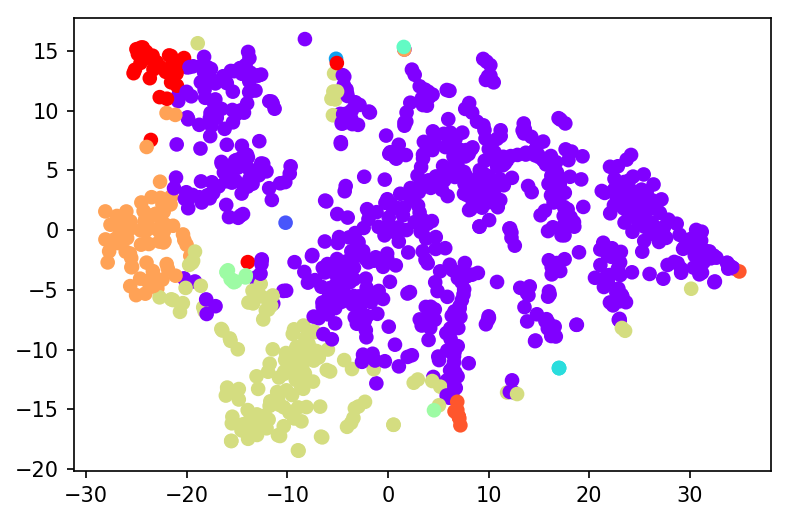

In [133]:
km = KMeans(n_clusters=10)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.102601
[t-SNE] Computed conditional probabilities in 0.115s
[t-SNE] Iteration 50: error = 62.9677467, gradient norm = 0.1960485 (50 iterations in 4.862s)
[t-SNE] Iteration 100: error = 61.9130630, gradient norm = 0.2027324 (50 iterations in 2.662s)
[t-SNE] Iteration 150: error = 61.7621460, gradient norm = 0.1905544 (50 iterations in 2.553s)
[t-SNE] Iteration 200: error = 61.7512321, gradient norm = 0.1913734 (50 iterations in 2.291s)
[t-SNE] Iteration 250: error = 61.7822838, gradient norm = 0.2040543 (50 iterations in 2.696s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.782284
[t-SNE] Iteration 300: error = 0.7208471, gradient norm = 0.0008257 (50 iterations in 2.267s)
[t-SNE] Iteration 350: error = 0.6737322, gradient norm = 0.0002

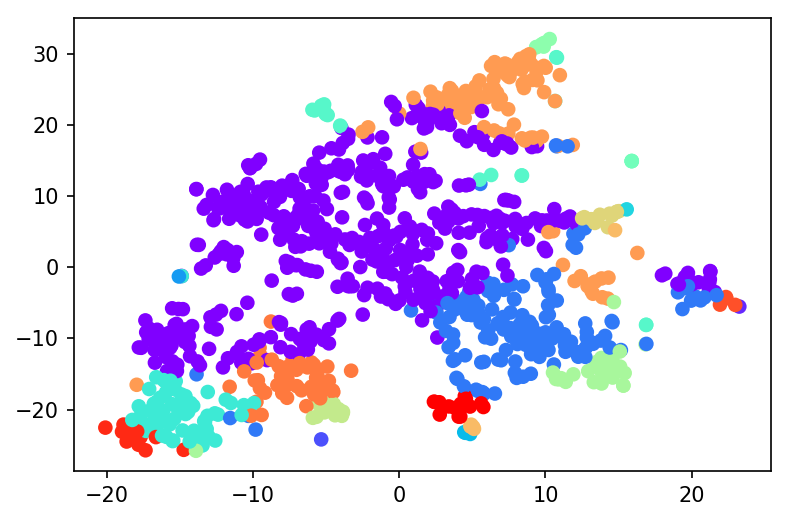

In [134]:
km = KMeans(n_clusters=20)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.102601
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 62.9812508, gradient norm = 0.1973813 (50 iterations in 2.687s)
[t-SNE] Iteration 100: error = 61.9187050, gradient norm = 0.1989353 (50 iterations in 2.367s)
[t-SNE] Iteration 150: error = 61.7506485, gradient norm = 0.1915115 (50 iterations in 2.303s)
[t-SNE] Iteration 200: error = 61.7739830, gradient norm = 0.1891101 (50 iterations in 2.280s)
[t-SNE] Iteration 250: error = 61.7973557, gradient norm = 0.1921540 (50 iterations in 2.231s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.797356
[t-SNE] Iteration 300: error = 0.7376033, gradient norm = 0.0008268 (50 iterations in 2.279s)
[t-SNE] Iteration 350: error = 0.6872903, gradient norm = 0.0004

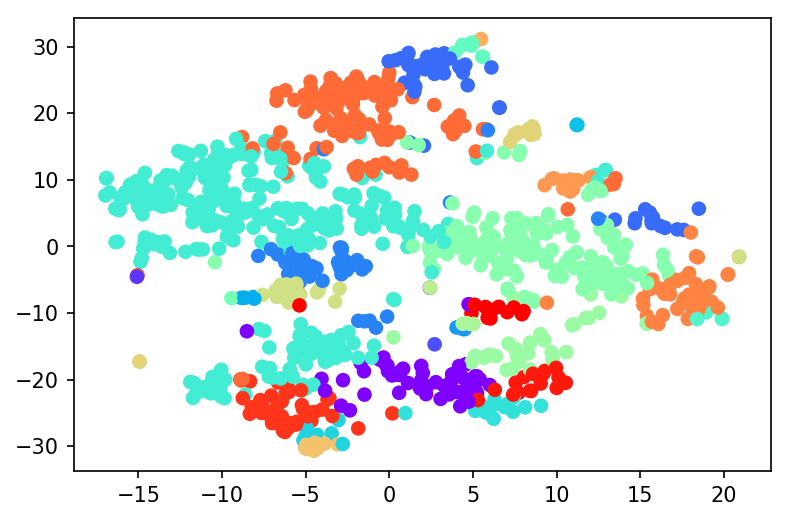

In [135]:
km = KMeans(n_clusters=30)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

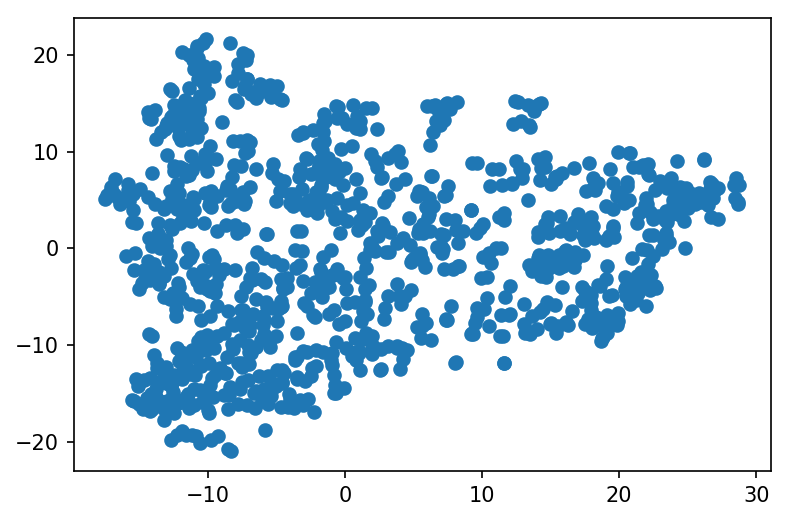

In [136]:
plt.figure(dpi=150)
plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], cmap=plt.cm.rainbow);

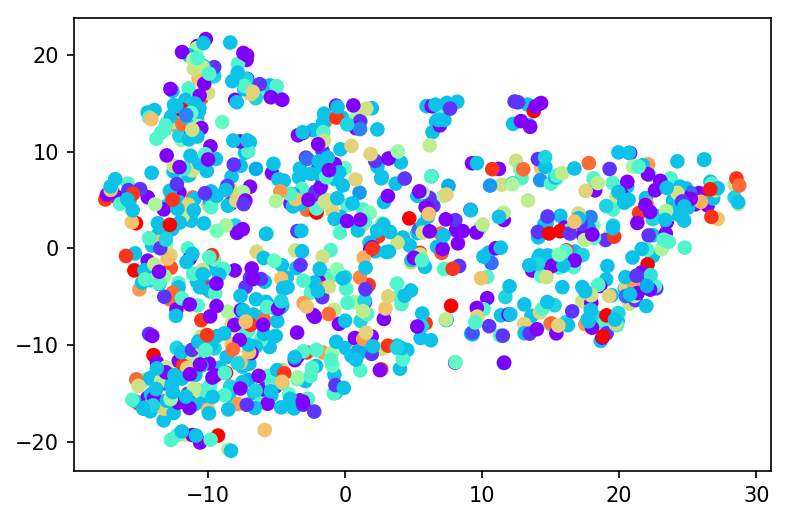

In [137]:
plt.figure(dpi=150)
plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], c=clusts, cmap=plt.cm.rainbow);

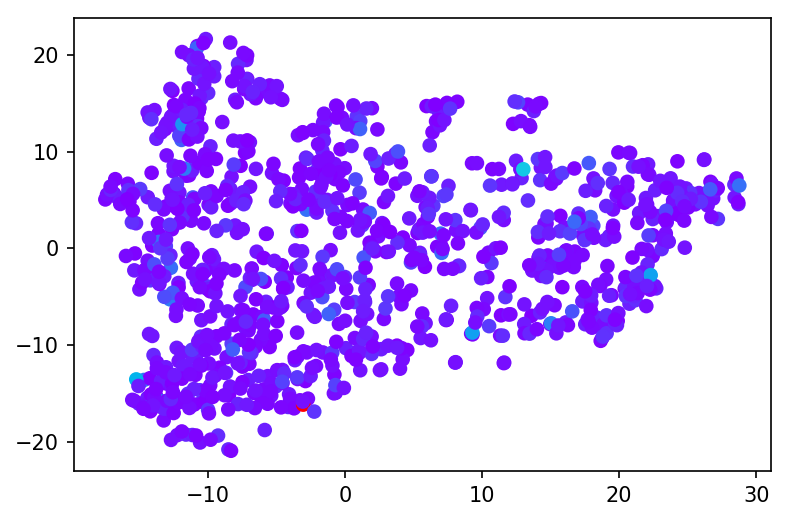

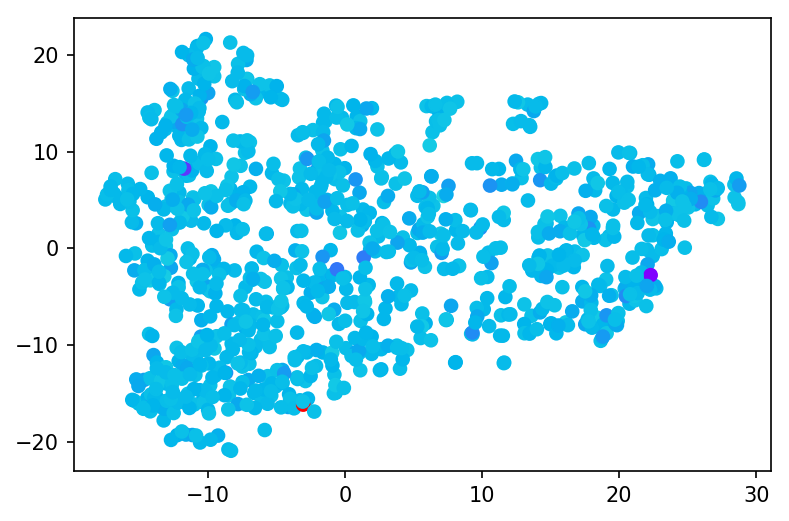

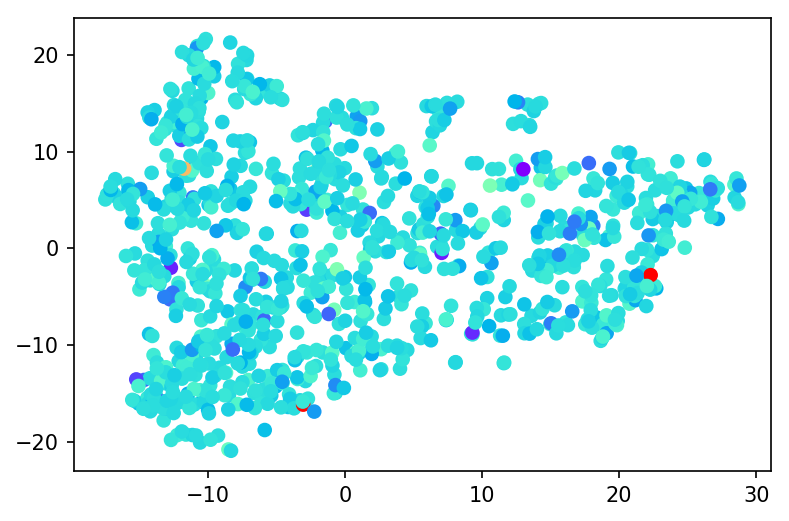

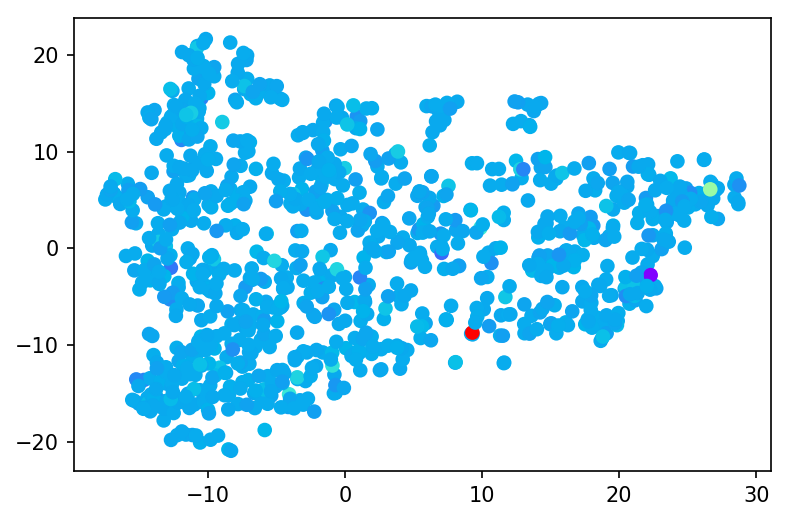

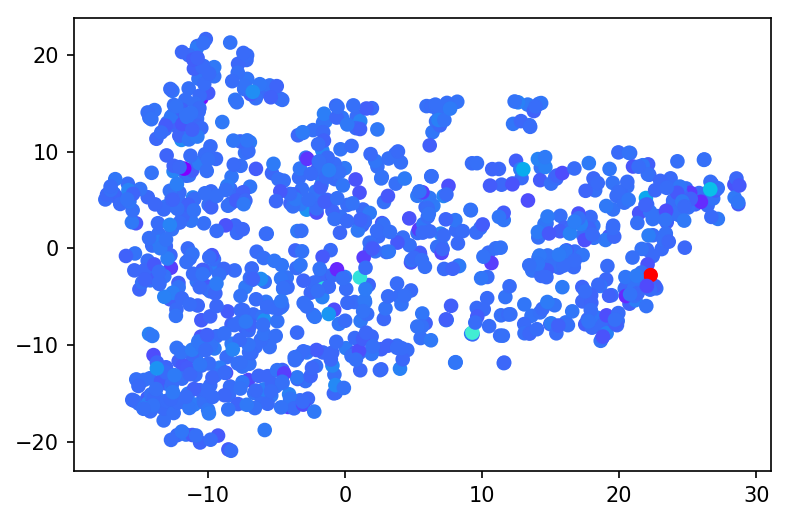

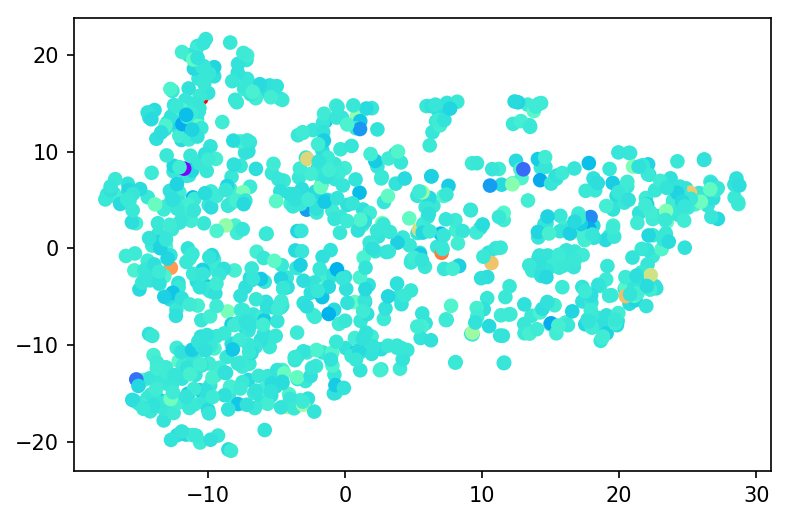

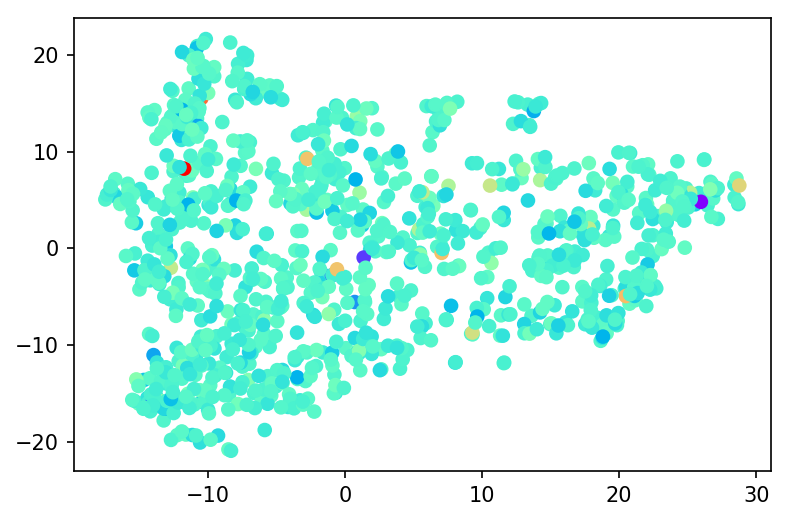

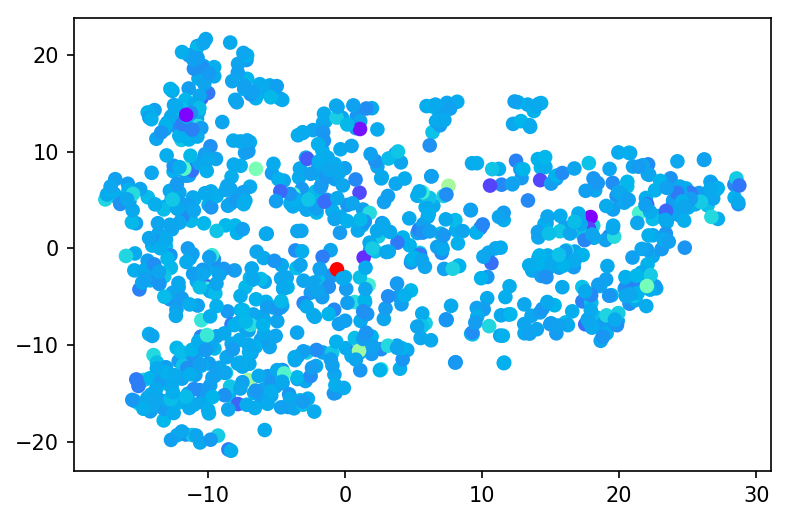

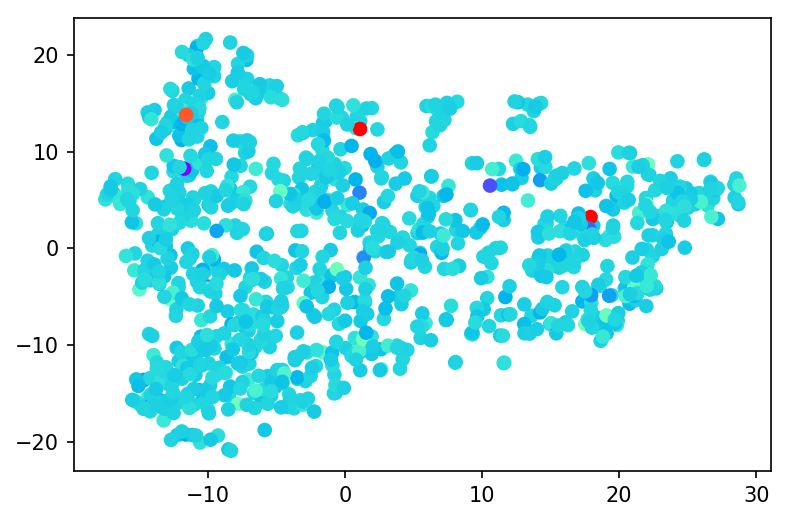

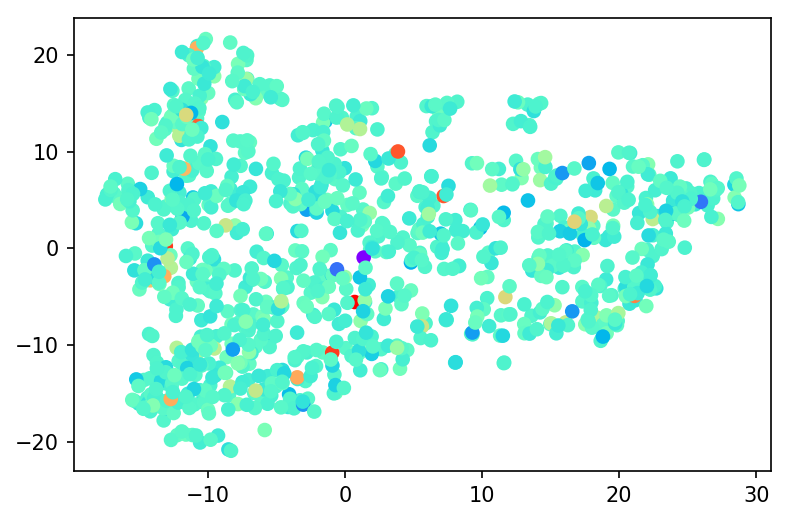

In [138]:
for i in range(10):
    plt.figure(dpi=150)
    plt.scatter(tsne_pos[:,0],tsne_pos[:,1], c=lsa_cv_articles_data[:,i], cmap=plt.cm.rainbow)

In [139]:
lsa_cv_articles_data.shape

(1000, 10)

In [140]:
from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(lsa_tfidf_articles_data)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(lsa_tfidf_articles_data, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

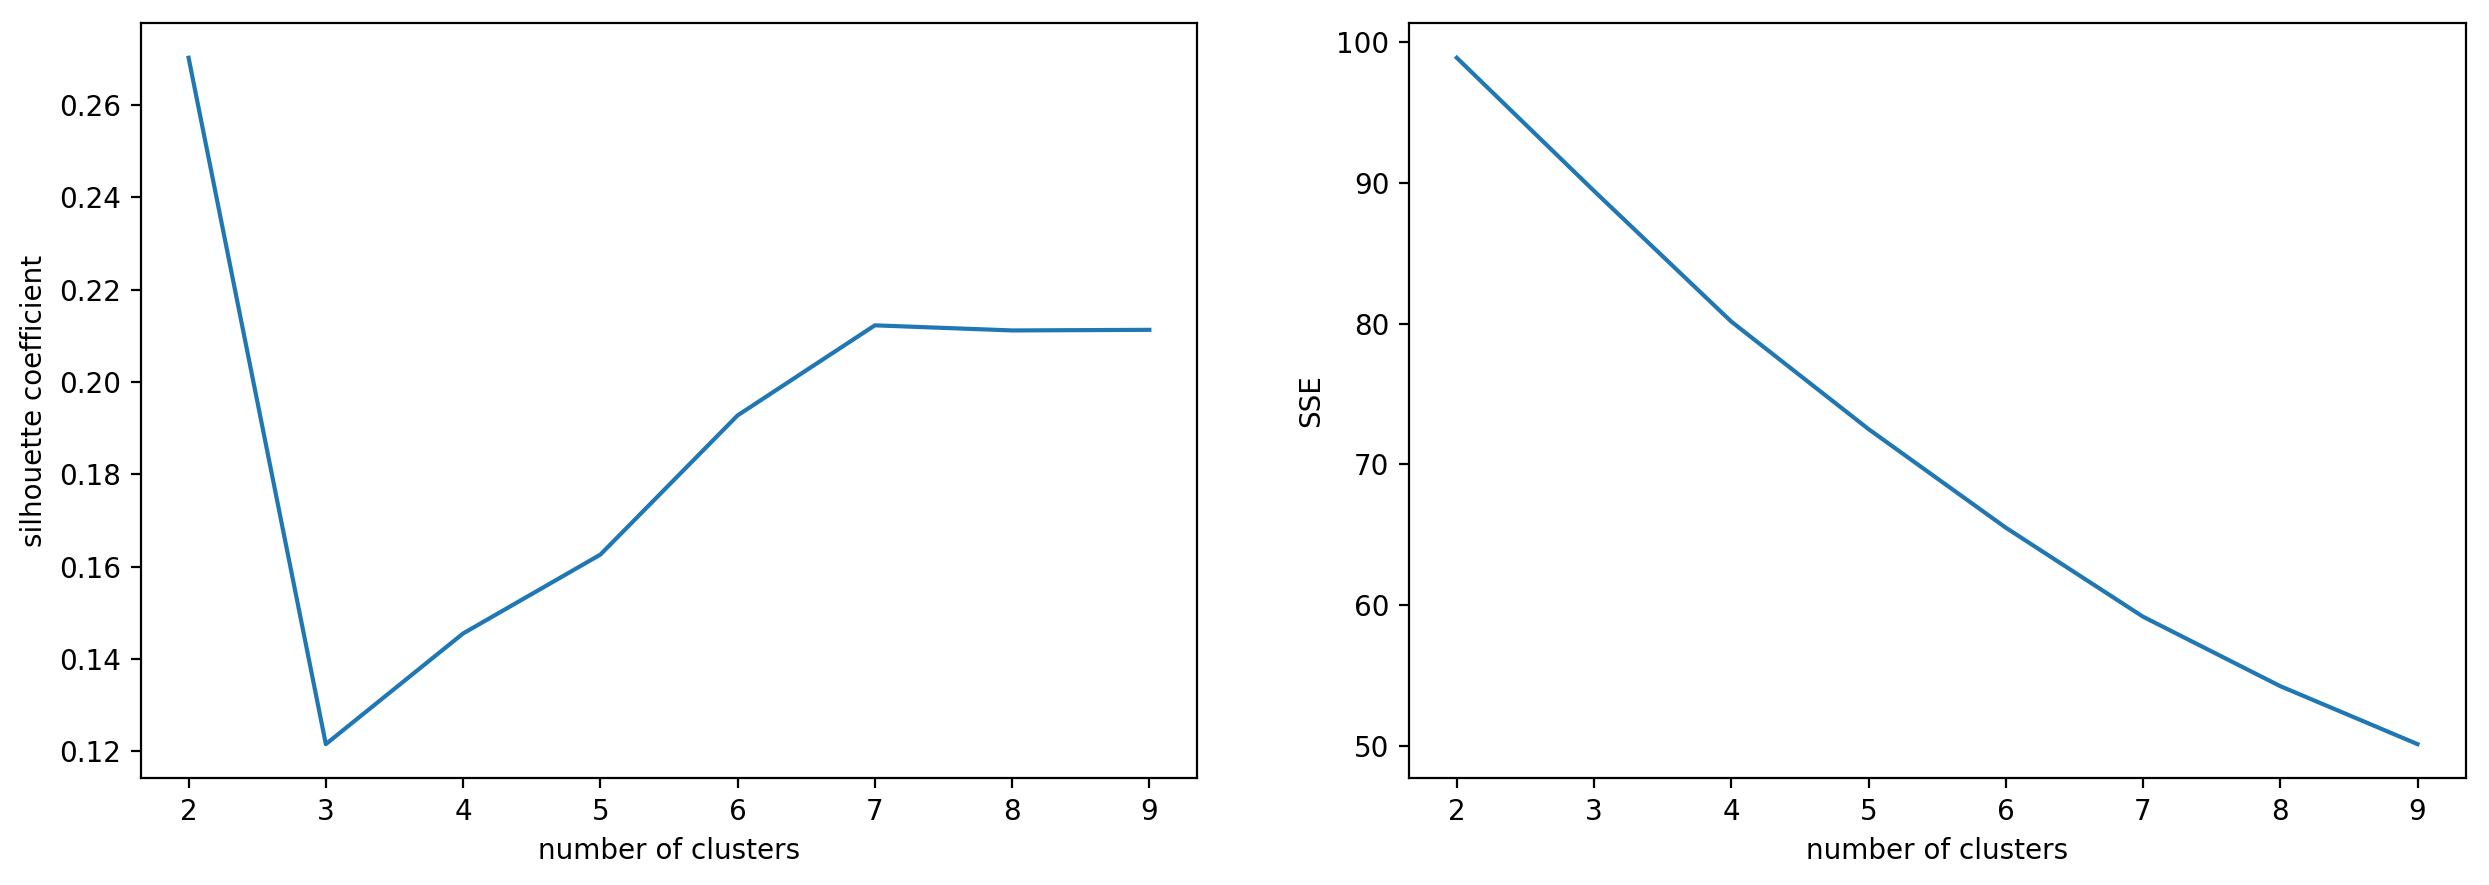

In [141]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');